In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Simple Gradient Descent
==============
Minimize: $f(\theta)=4\theta^2-200\theta+50$

Theta that produces the smallest value 25.000000033214047
Num iterations :  13


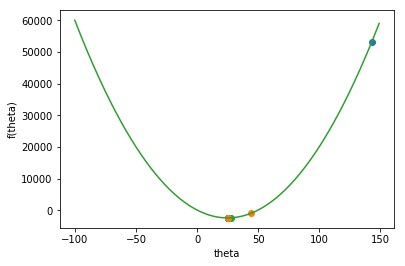

In [17]:
thetas = np.arange(-100, 150)

def f(theta):
    #YOUR CODE HERE: function f
    return 4 * theta * theta - 200 * theta + 50
    pass

def compute_gradient(theta):
    #YOUR CODE HERE: gradient of the function f
    return 8 * theta - 200
    pass

def update(theta, alpha, grad):
    #YOUR CODE HERE: Gradient descent update
    return theta - alpha * grad
    pass

error = 1.0
tolerance = 1e-5
alpha = 0.105   #learning rate

theta = 143
iteration = 1
max_iteration = 1000

while error > tolerance and iteration < max_iteration:
    val = f(theta)
    plt.plot(theta, f(theta), 'o')
    grad = compute_gradient(theta)
    
    theta = update(theta, alpha, grad)

    error = np.sum(abs(grad))
    
    iteration = iteration + 1

print('Theta that produces the smallest value', theta)
print("Num iterations : ", iteration)

plt.plot(thetas, f(thetas), '-')
plt.xlabel('theta')
plt.ylabel('f(theta)')

plt.show()

Linear Regression
==========
Load the data first

In [44]:
data = np.loadtxt("Linear_Regression.txt")

## Train


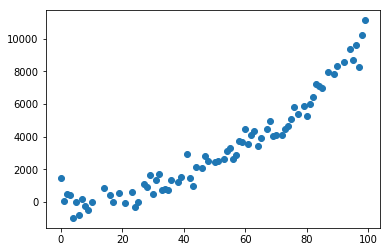

In [45]:
np.random.seed(7)
shuffle = np.random.permutation(data.shape[0])

portion = int(0.2 * len(data))

#split into train and validation data
test_x = data[shuffle[:portion], 0].reshape(-1, 1)
test_y = data[shuffle[:portion], 1].reshape(-1, 1)

train_x = data[shuffle[portion:], 0].reshape(-1, 1)
train_y = data[shuffle[portion:], 1].reshape(-1, 1)

# Plot data
plt.plot(train_x, train_y, 'o')

In [50]:
#pad x with 1 at the beginning
def pad(x):
    return np.hstack((np.ones((x.shape[0], 1), dtype = x.dtype), x))

def predict(theta, x):
    #YOUR CODE HERE: Given input x and parameter theta, predict output
    x = pad(x)
    return np.dot(x, theta.T)
    pass

# def compute_gradient(theta, x, y):
#     #YOUR CODE HERE: Radient of the loss function
#     grad = np.zeros(theta.shape)
#     for i in range(x.shape[0]):
#         grad += 2 * (np.dot(theta, x[i]) - y[i]) * x[i]
#     grad /= x.shape[0]
# #     pred = np.sum(theta * x, axis=1, keepdims=True)
#     pred = np.dot(x, theta.T)
#     deviation = y - pred
#     error = np.sum(np.abs(deviation)) / x.shape[0]
    
#     return grad, error

def compute_gradient(theta, x, y):
    n_samples = x.shape[0]
    deviation = np.dot(x, theta.T) - y
    grad = np.dot(deviation.T, x) / n_samples
#     error = np.sum(np.abs(deviation)) / n_samples
    error = np.sum(deviation ** 2) / n_samples
    
    return grad, error

Iteration: 10000 - Error: 1591068.3982
Iteration: 20000 - Error: 1563040.2876
Iteration: 30000 - Error: 1536367.1768
Iteration: 40000 - Error: 1510983.5594
Iteration: 50000 - Error: 1486827.0956
Iteration: 60000 - Error: 1463838.4594
Iteration: 70000 - Error: 1441961.1932
Iteration: 80000 - Error: 1421141.5685
Iteration: 90000 - Error: 1401328.4543
Iteration: 100000 - Error: 1382473.1915
Iteration: 110000 - Error: 1364529.4735
Iteration: 120000 - Error: 1347453.2323
Iteration: 130000 - Error: 1331202.5303
Iteration: 140000 - Error: 1315737.4574
Iteration: 150000 - Error: 1301020.0328
Iteration: 160000 - Error: 1287014.1121
Iteration: 170000 - Error: 1273685.2980
Iteration: 180000 - Error: 1261000.8563
Iteration: 190000 - Error: 1248929.6353
Iteration: 200000 - Error: 1237441.9892
Iteration: 210000 - Error: 1226509.7055
Iteration: 220000 - Error: 1216105.9356
Iteration: 230000 - Error: 1206205.1288
Iteration: 240000 - Error: 1196782.9698
Iteration: 250000 - Error: 1187816.3186
Iteration

Iteration: 2040000 - Error: 1011333.0054
Iteration: 2050000 - Error: 1011331.8059
Iteration: 2060000 - Error: 1011330.6644
Iteration: 2070000 - Error: 1011329.5781
Iteration: 2080000 - Error: 1011328.5443
Iteration: 2090000 - Error: 1011327.5604
Iteration: 2100000 - Error: 1011326.6242
Iteration: 2110000 - Error: 1011325.7332
Iteration: 2120000 - Error: 1011324.8852
Iteration: 2130000 - Error: 1011324.0783
Iteration: 2140000 - Error: 1011323.3103
Iteration: 2150000 - Error: 1011322.5795
Iteration: 2160000 - Error: 1011321.8841
Iteration: 2170000 - Error: 1011321.2222
Iteration: 2180000 - Error: 1011320.5924
Iteration: 2190000 - Error: 1011319.9930
Iteration: 2200000 - Error: 1011319.4225
Iteration: 2210000 - Error: 1011318.8797
Iteration: 2220000 - Error: 1011318.3631
Iteration: 2230000 - Error: 1011317.8714
Iteration: 2240000 - Error: 1011317.4036
Iteration: 2250000 - Error: 1011316.9583
Iteration: 2260000 - Error: 1011316.5346
Iteration: 2270000 - Error: 1011316.1314
Iteration: 22800

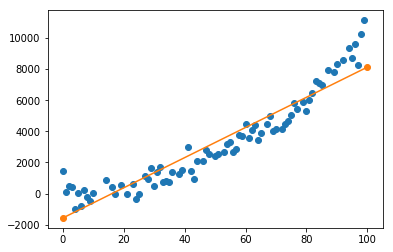

In [61]:
# Pad x with 1
padded_train_x = pad(train_x)
# print("Padded Train_x shape = ", padded_train_x.shape)

theta = np.random.randn(2).reshape(1,2)

alpha = 1e-5
tolerance = 1e-5

# Perform Gradient Descent
iterations = 1
max_iterations = 1000000
error_history = []
while True:
    gradient, error = compute_gradient(theta, padded_train_x, train_y)
    assert(gradient.shape == theta.shape)
    new_theta = theta - alpha * gradient
    error_history.append(error)

    # Stopping Condition
    if np.sum(abs(new_theta - theta)) < tolerance:
        print("Converged.")
        break
    
    # Print error every 50 iterations
    if iterations % 50000 == 0:
        print("Iteration: %d - Error: %.4f" %(iterations, error))
#         print("Grad: ", gradient)
#     if iterations > max_iterations:
#         break
    
    iterations += 1
    theta = new_theta

print("\nTheta : ", theta)
# plt.plot(error_history)

line_x = np.array([0, 100]).reshape([2,1])
line_y = predict(theta, line_x)


plt.plot(train_x, train_y, 'o')
plt.plot(line_x, line_y, marker = 'o')

plt.show()

## Validatation


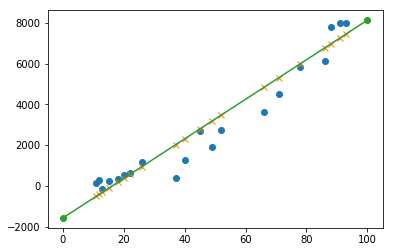

In [55]:
test_y_hat = predict(theta, test_x)

plt.plot(test_x, test_y, 'o')
plt.plot(test_x, test_y_hat, 'x')
plt.plot(line_x, line_y, marker = 'o')
plt.show()